In [2]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [3]:
def load_photos(directory):
    images = []
    labels_speed = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[1])
        value_speed = float(name.split('_')[0])
        labels_dir.append(value_dir)
        labels_speed.append(value_speed)
        images.append(image)
    return images, labels_speed, labels_dir

In [4]:
dataset = "BigOne_Race_5"

In [5]:
# load images from both train and test groups
directory = dataset+'/Train'
images, labels_speed, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 7953


In [6]:
#Normalise images
images = np.array(images)
images /= 255.0

In [7]:
#convert datas to dummyvalues
labels_speed = np.array(pd.get_dummies(labels_speed))
labels_dir = np.array(pd.get_dummies(labels_dir))

(array([1, 0], dtype=uint8),
 array([0, 0, 0, 1, 0], dtype=uint8),
 <matplotlib.image.AxesImage at 0x7fcbce465be0>)

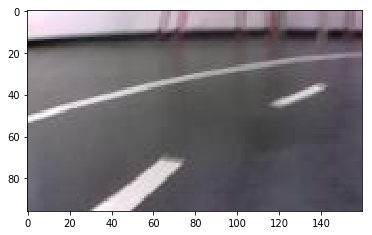

In [8]:
labels_speed[42], labels_dir[42], plt.imshow(images[42])

In [9]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [10]:
#from keras.models import load_model
#model = load_model("model_bigrace_original_5.h5")

In [105]:
'''
Model from PatateV2
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Flatten(name='flattened')(x)


x = Dropout(.5)(x)
x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

# Multitask Output

out_speed = Dense(2, activation='softmax')(x)

out_dir = Dense(5, activation='softmax')(x)


# Compile Model
model = Model(inputs=[img_in], outputs=[out_speed, out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 96, 160, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 46, 78, 2)    150         img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 46, 78, 2)    8           conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 46, 78, 2)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [106]:
model_name="model_bigrace_original_5.h5"

In [107]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [108]:
h = model.fit(images, [labels_speed, labels_dir], batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 6362 samples, validate on 1591 samples
Epoch 1/100
6362/6362 [==============================] - 5s 862us/step - loss: 2.3421 - dense_3_loss: 0.5967 - dense_4_loss: 1.7455 - dense_3_acc: 0.7073 - dense_4_acc: 0.2649 - val_loss: 1.8869 - val_dense_3_loss: 0.4652 - val_dense_4_loss: 1.4217 - val_dense_3_acc: 0.7593 - val_dense_4_acc: 0.4375

Epoch 00001: val_loss improved from inf to 1.88692, saving model to model_bigrace_original_5.h5
Epoch 2/100
6362/6362 [==============================] - 4s 578us/step - loss: 1.8955 - dense_3_loss: 0.4516 - dense_4_loss: 1.4440 - dense_3_acc: 0.7704 - dense_4_acc: 0.4198 - val_loss: 1.5661 - val_dense_3_loss: 0.3887 - val_dense_4_loss: 1.1773 - val_dense_3_acc: 0.8096 - val_dense_4_acc: 0.6040

Epoch 00002: val_loss improved from 1.88692 to 1.56607, saving model to model_bigrace_original_5.h5
Epoch 3/100
6362/6362 [==============================] - 4s 586us/step - loss: 1.6676 - dense_3_loss: 0.3955 - dense_4_loss: 1.2721 - dense_3_acc: 0.795


Epoch 00022: val_loss did not improve
Epoch 23/100
6362/6362 [==============================] - 4s 596us/step - loss: 0.6966 - dense_3_loss: 0.1936 - dense_4_loss: 0.5030 - dense_3_acc: 0.9184 - dense_4_acc: 0.8172 - val_loss: 0.6272 - val_dense_3_loss: 0.1817 - val_dense_4_loss: 0.4455 - val_dense_3_acc: 0.9271 - val_dense_4_acc: 0.8404

Epoch 00023: val_loss did not improve
Epoch 24/100
6362/6362 [==============================] - 4s 612us/step - loss: 0.7122 - dense_3_loss: 0.2088 - dense_4_loss: 0.5034 - dense_3_acc: 0.9134 - dense_4_acc: 0.8130 - val_loss: 0.5492 - val_dense_3_loss: 0.1807 - val_dense_4_loss: 0.3685 - val_dense_3_acc: 0.9290 - val_dense_4_acc: 0.8812

Epoch 00024: val_loss improved from 0.55985 to 0.54920, saving model to model_bigrace_original_5.h5
Epoch 25/100
6362/6362 [==============================] - 4s 599us/step - loss: 0.6866 - dense_3_loss: 0.1992 - dense_4_loss: 0.4874 - dense_3_acc: 0.9173 - dense_4_acc: 0.8189 - val_loss: 0.5705 - val_dense_3_loss: 0

6362/6362 [==============================] - 4s 582us/step - loss: 0.5718 - dense_3_loss: 0.1751 - dense_4_loss: 0.3968 - dense_3_acc: 0.9288 - dense_4_acc: 0.8584 - val_loss: 0.5011 - val_dense_3_loss: 0.1675 - val_dense_4_loss: 0.3336 - val_dense_3_acc: 0.9359 - val_dense_4_acc: 0.8850

Epoch 00046: val_loss did not improve
Epoch 47/100
6362/6362 [==============================] - 4s 593us/step - loss: 0.5811 - dense_3_loss: 0.1763 - dense_4_loss: 0.4049 - dense_3_acc: 0.9319 - dense_4_acc: 0.8538 - val_loss: 0.4429 - val_dense_3_loss: 0.1601 - val_dense_4_loss: 0.2828 - val_dense_3_acc: 0.9353 - val_dense_4_acc: 0.9070

Epoch 00047: val_loss improved from 0.47592 to 0.44290, saving model to model_bigrace_original_5.h5
Epoch 48/100
6362/6362 [==============================] - 4s 602us/step - loss: 0.5795 - dense_3_loss: 0.1799 - dense_4_loss: 0.3995 - dense_3_acc: 0.9310 - dense_4_acc: 0.8595 - val_loss: 0.5610 - val_dense_3_loss: 0.1822 - val_dense_4_loss: 0.3788 - val_dense_3_acc: 


Epoch 00069: val_loss improved from 0.38977 to 0.38926, saving model to model_bigrace_original_5.h5
Epoch 70/100
6362/6362 [==============================] - 4s 586us/step - loss: 0.4952 - dense_3_loss: 0.1627 - dense_4_loss: 0.3326 - dense_3_acc: 0.9357 - dense_4_acc: 0.8820 - val_loss: 0.3960 - val_dense_3_loss: 0.1496 - val_dense_4_loss: 0.2463 - val_dense_3_acc: 0.9428 - val_dense_4_acc: 0.9227

Epoch 00070: val_loss did not improve
Epoch 71/100
6362/6362 [==============================] - 4s 587us/step - loss: 0.5068 - dense_3_loss: 0.1608 - dense_4_loss: 0.3460 - dense_3_acc: 0.9379 - dense_4_acc: 0.8779 - val_loss: 0.5000 - val_dense_3_loss: 0.1695 - val_dense_4_loss: 0.3305 - val_dense_3_acc: 0.9441 - val_dense_4_acc: 0.8894

Epoch 00071: val_loss did not improve
Epoch 72/100
6362/6362 [==============================] - 4s 587us/step - loss: 0.5059 - dense_3_loss: 0.1636 - dense_4_loss: 0.3423 - dense_3_acc: 0.9368 - dense_4_acc: 0.8763 - val_loss: 0.4082 - val_dense_3_loss: 0

6362/6362 [==============================] - 4s 582us/step - loss: 0.4676 - dense_3_loss: 0.1545 - dense_4_loss: 0.3131 - dense_3_acc: 0.9396 - dense_4_acc: 0.8860 - val_loss: 0.3847 - val_dense_3_loss: 0.1473 - val_dense_4_loss: 0.2375 - val_dense_3_acc: 0.9447 - val_dense_4_acc: 0.9265

Epoch 00093: val_loss did not improve
Epoch 94/100
6362/6362 [==============================] - 4s 593us/step - loss: 0.4575 - dense_3_loss: 0.1564 - dense_4_loss: 0.3010 - dense_3_acc: 0.9389 - dense_4_acc: 0.8906 - val_loss: 0.6050 - val_dense_3_loss: 0.1779 - val_dense_4_loss: 0.4271 - val_dense_3_acc: 0.9283 - val_dense_4_acc: 0.8605

Epoch 00094: val_loss did not improve
Epoch 95/100
6362/6362 [==============================] - 4s 591us/step - loss: 0.4665 - dense_3_loss: 0.1539 - dense_4_loss: 0.3126 - dense_3_acc: 0.9420 - dense_4_acc: 0.8860 - val_loss: 0.5883 - val_dense_3_loss: 0.2092 - val_dense_4_loss: 0.3791 - val_dense_3_acc: 0.9114 - val_dense_4_acc: 0.8523

Epoch 00095: val_loss did no

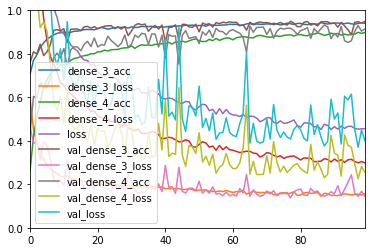

In [109]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))